<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/fishify_model_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fishify

## Load Data

In [1]:
import pathlib

from google.colab import drive
drive.mount('/content/drive')

data_dir = "drive/MyDrive/capstone_project"
data_dir = pathlib.Path(data_dir)


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/capstone_project/fishify/datasets/fish
!ls

/content/drive/MyDrive/capstone_project/fishify/datasets/fish
fish_classification_model.h5				  model.png    Validation
FishiFy.h5						  RGB_dataset
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5  Training


# Data Processing


In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model

In [ ]:
file_path ="/content/drive/MyDrive/capstone_project/fishify/datasets/fish/"
class_name=sorted(os.listdir(file_path+'Training'))

kembung_path = os.path.join(file_path+'Training/ikan_kembung')
mujair_path = os.path.join(file_path+'Training/ikan_mujair')
bawal_path = os.path.join(file_path+'Training/ikan_bawal')
belut_path = os.path.join(file_path+'Training/ikan_belut')
gurame_path = os.path.join(file_path+'Training/ikan_gurame')
kakap_path = os.path.join(file_path+'Training/ikan_kakap')
lele_path = os.path.join(file_path+'Training/ikan_lele')
udang_path = os.path.join(file_path+'Training/udang')
mas_path = os.path.join(file_path+'Training/ikan_mas')
nila_path = os.path.join(file_path+'Training/ikan_nila')
tenggiri_path = os.path.join(file_path+'Training/ikan_tenggiri')
tongkol_path = os.path.join(file_path+'Training/ikan_tongkol')
tuna_path = os.path.join(file_path+'Training/ikan_tuna')

kembung_files=os.listdir(kembung_path)
mujair_files=os.listdir(mujair_path)
bawal_files=os.listdir(bawal_path)
belut_files=os.listdir(belut_path)
gurame_files=os.listdir(gurame_path)
kakap_files=os.listdir(kakap_path)
lele_files=os.listdir(lele_path)
udang_files=os.listdir(udang_path)
mas_files=os.listdir(mas_path)
nila_files=os.listdir(nila_path)
tenggiri_files=os.listdir(tenggiri_path)
tongkol_files=os.listdir(tongkol_path)
tuna_files=os.listdir(tuna_path)

print(class_name)

print('\n=========================================================\n')

print('total training ikan kembung', len(os.listdir(kembung_path)))
print('total training ikan mujair', len(os.listdir(mujair_path)))
print('total training ikan bawal', len(os.listdir(bawal_path)))
print('total training ikan belut', len(os.listdir(belut_path)))
print('total training ikan gurame', len(os.listdir(gurame_path)))
print('total training ikan kakap', len(os.listdir(kakap_path)))
print('total training ikan lele', len(os.listdir(lele_path)))
print('total training udang', len(os.listdir(udang_path)))
print('total training ikan mas', len(os.listdir(mas_path)))
print('total training ikan nila', len(os.listdir(nila_path)))
print('total training ikan tenggiri', len(os.listdir(tenggiri_path)))
print('total training ikan tongkol', len(os.listdir(tongkol_path)))
print('total training ikan tuna', len(os.listdir(tuna_path)))

print('\n=========================================================\n')

print(kembung_files[:5])
print(mujair_files[:5])
print(bawal_files[:5])
print(belut_files[:5])
print(gurame_files[:5])
print(kakap_files[:5])
print(lele_files[:5])
print(udang_files[:5])
print(mas_files[:5])
print(nila_files[:5])
print(tenggiri_files[:5])
print(tongkol_files[:5])
print(tuna_files[:5])

['ikan_bawal', 'ikan_belut', 'ikan_gurame', 'ikan_kakap', 'ikan_kembung', 'ikan_lele', 'ikan_mas', 'ikan_mujair', 'ikan_nila', 'ikan_tenggiri', 'ikan_tongkol', 'ikan_tuna', 'udang']


total training ikan kembung 100
total training ikan mujair 100
total training ikan bawal 100
total training ikan belut 100
total training ikan gurame 100
total training ikan kakap 100
total training ikan lele 100
total training udang 100
total training ikan mas 100
total training ikan nila 99
total training ikan tenggiri 100
total training ikan tongkol 100
total training ikan tuna 101


['kembung_1.jpg', 'kembung_3.jpg', 'kembung_16.jpg', 'kembung_7.jpg', 'kembung_38.jpg']
['Mujair (16).jpg', 'Mujair (15).jpg', 'Mujair (9).jpg', 'Mujair (8).jpg', 'Mujair (11).jpg']
['bawal_43.jpg', 'bawal_25.jpg', 'bawal_41.jpg', 'bawal_3.jpg', 'bawal_52.jpg']
['belut_88.jpg', 'belut_86.jpg', 'belut_85.jpg', 'belut_93.jpg', 'belut_97.jpg']
['gurame_67.jpg', 'gurame_51.jpg', 'gurame_48.jpg', 'gurame_41.jpg', 'gurame_14.jpg

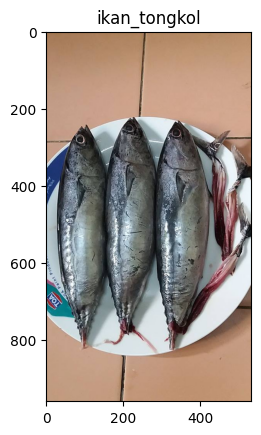

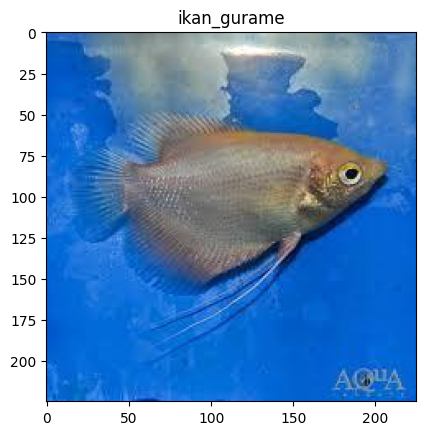

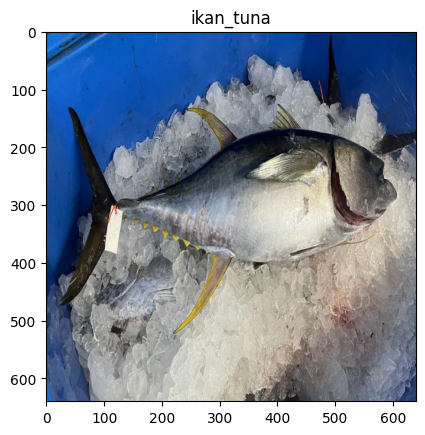

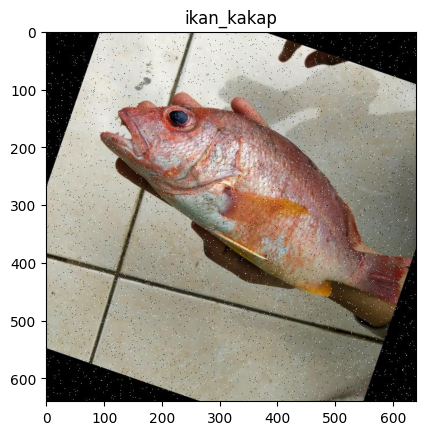

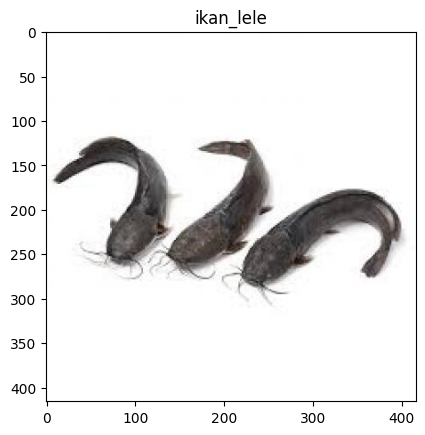

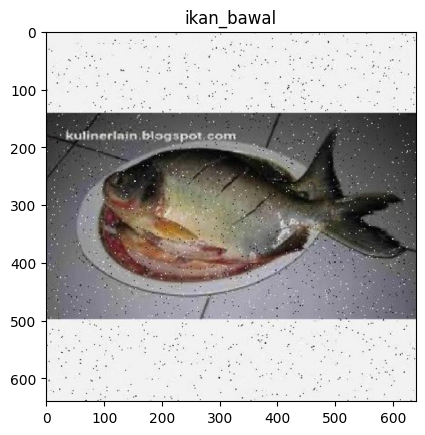

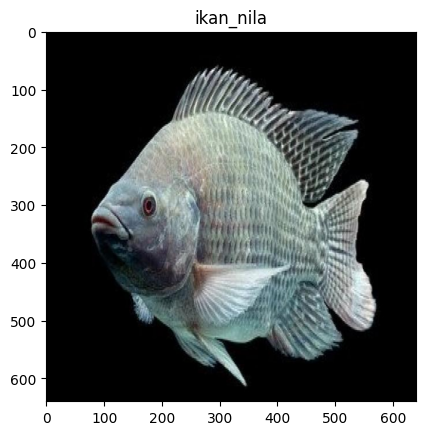

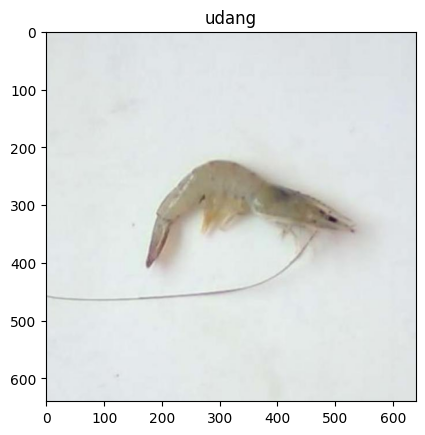

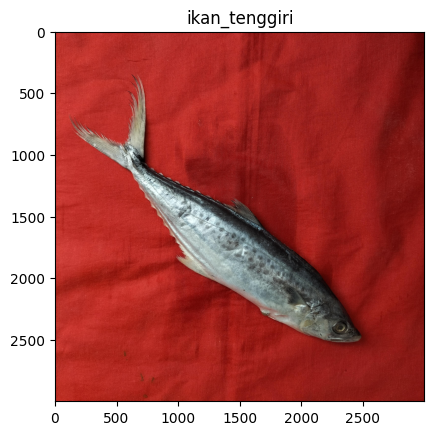

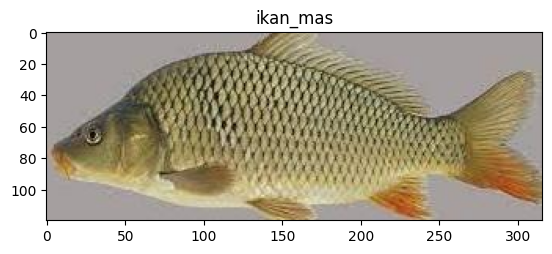

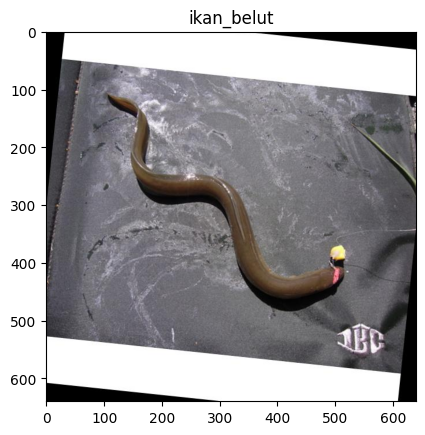

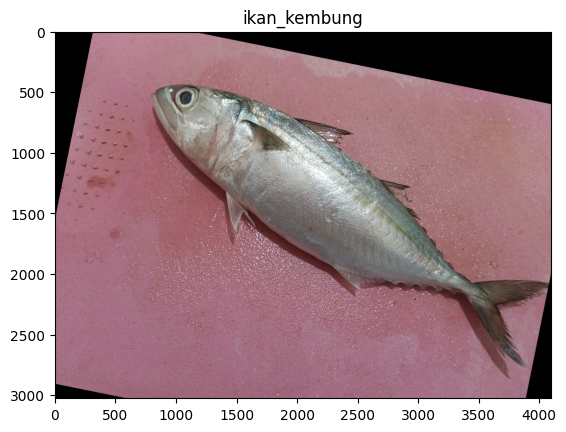

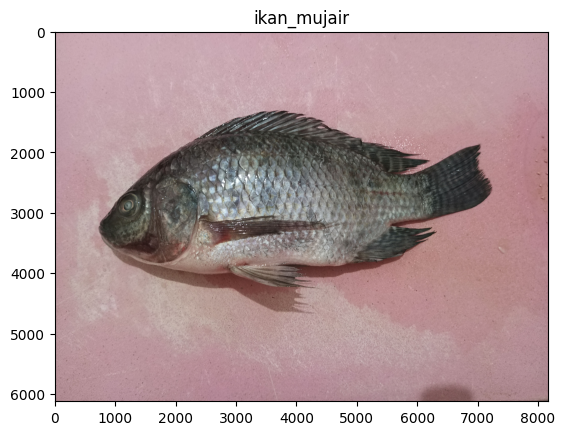

In [ ]:
class_dirs = [d for d in os.listdir(file_path+'Training') if os.path.isdir(os.path.join(file_path+'Training', d))]

for class_dir in class_dirs:
    class_dir_path = os.path.join(file_path+'Training', class_dir)
    image_file = os.listdir(class_dir_path)[0]
    image_path = os.path.join(class_dir_path, image_file)

    # Muat dan tampilkan gambar
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(class_dir)
    plt.show()

# Training and Validation Generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    channel_shift_range=0.1,
    brightness_range=[0.8, 1.2],)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    file_path+'Training',
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
    )

validation_generator = val_datagen.flow_from_directory(
    file_path+'Validation',
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
    )

Found 1300 images belonging to 13 classes.
Found 258 images belonging to 13 classes.


# Transfer Learning

In [ ]:
    inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
    urllib.request.urlretrieve(
        inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
    local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

    pre_trained_model = InceptionV3(input_shape= (224,224,3),
                                    include_top= False,
                                    weights= None) # YOUR CODE HERE

    pre_trained_model.load_weights(local_weights_file)

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_layer.output

In [ ]:
from tensorflow.keras import regularizers

# Build the CNN model
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),

    # hidden layer from 256 to 512 with BatchNormalization
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    # add hidden layer 256
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    # Output Dense Layer
    tf.keras.layers.Dense(13, activation='softmax')
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,  # You can adjust the number of epochs based on your needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Display the model summary
model.summary()


Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 13.6023 - accuracy: 0.3625 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 463s 23s/step - loss: 13.6023 - accuracy: 0.3625 - val_loss: 13.5593 - val_accuracy: 0.2930
Epoch 2/100
20/20 [==============================] - 68s 4s/step - loss: 12.6482 - accuracy: 0.6068 - val_loss: 13.2569 - val_accuracy: 0.4219
Epoch 3/100
20/20 [==============================] - 65s 3s/step - loss: 12.2233 - accuracy: 0.7006 - val_loss: 12.9918 - val_accuracy: 0.4492
Epoch 4/100
20/20 [==============================] - 69s 4s/step - loss: 11.8311 - accuracy: 0.7896 - val_loss: 12.7762 - val_accuracy: 0.4492
Epoch 5/100
20/20 [==============================] - 65s 3s/step - loss: 11.5097 - accuracy: 0.8325 - val_loss: 12.5886 - val_accuracy: 0.4492
Epoch 6/100
20/20 [==============================] - 70s 4s/step - loss: 11.2343 - accuracy: 0.8439 - val_loss: 12.3383 - val_accuracy: 0.4766
Epoch 7/100
20/20 [==============================] - 73s 4s/step - loss: 10.9729 - accuracy: 0.8568 - val_loss: 12.1457 - val_accuracy: 0.4805
Epoch 8/1

### Plot Training

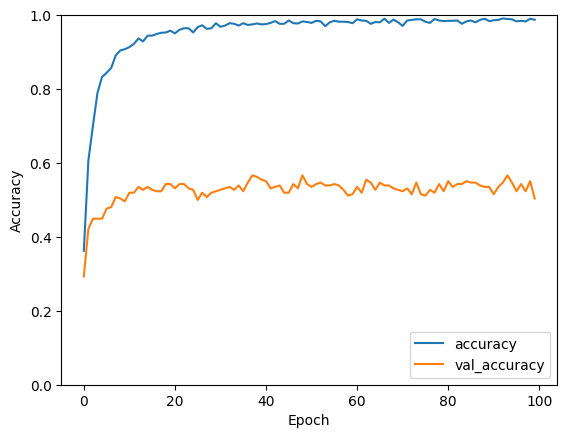

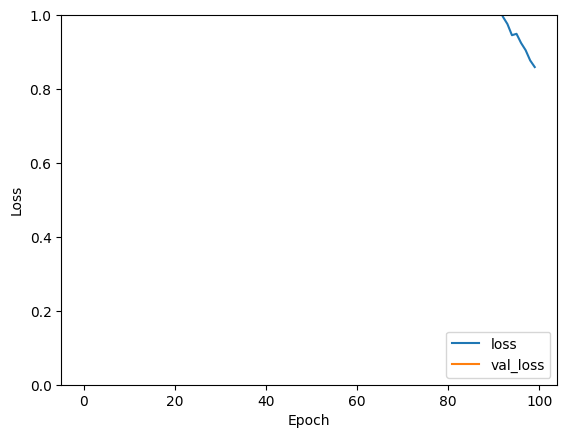

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Saved Model

In [ ]:
# Save the model
model.save("fish_classification_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
